# <a > Pandas를 이용하여 데이터 불러오기 </a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")

In [3]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


### <a > VDS 데이터 라벨링 전략 </a>

In [4]:
num_classes = 3 
class_labels= ['Jam', 'Slow', 'Normal']

In [5]:
def get_score(speed):
    if speed < 45:
        label = 'Jam'
    elif speed < 50:
        label = 'Slow'
    else :
        label = 'Normal'
    return label

In [6]:
df["label"] = df["Speed"].apply(lambda spd: get_score(spd))
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,label
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [7]:
label = df['label'].unique()
label

array(['Normal', 'Slow', 'Jam'], dtype=object)

### <a > Seaborn을 이용한 상관관계 등 가시화 </a>

<Axes: xlabel='label', ylabel='count'>

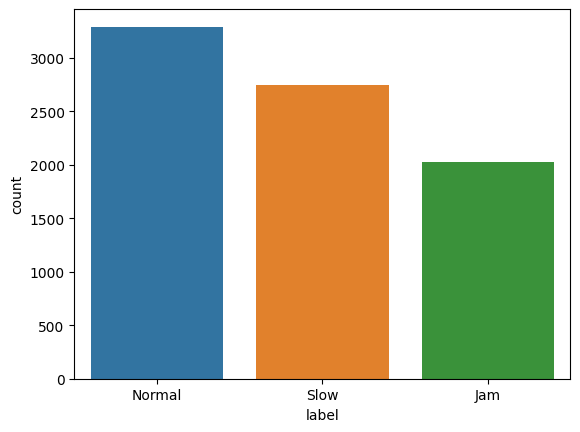

In [8]:
sns.countplot(x="label", data=df)

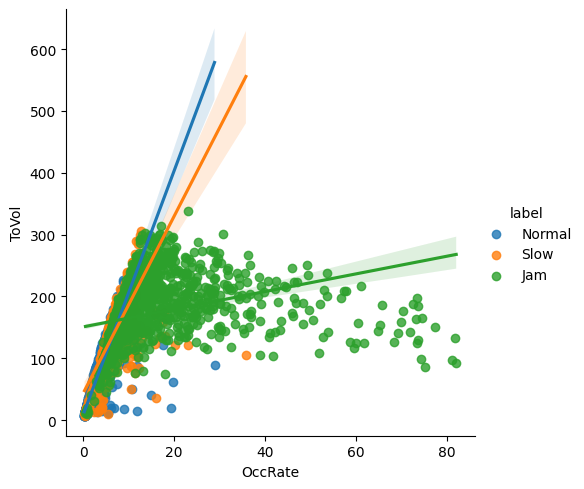

In [9]:
sns.lmplot(x="OccRate", y="ToVol", hue="label", data=df)

# <a > 머신러닝 적용하기 </a>

#### 특성과 라벨에 대하여 논의사항 
- 특성 중에서 ToVol=LaVol+MeVol+SmVol이다
- Speed를 이용하여 label을 만들었다.
- Speed를 특성 포함하는 것이 올바른가? 아니면 제외하는 것이 올바른 것인가?

In [10]:
X = df[['ToVol','LaVol','MeVol','SmVol', 'Speed','OccRate']]
y = df['label']

#### sklearn.preprocessing에 LabelEncoder를 이용하자 
- 라벨(y)는 텍스트로 되어 있어서 숫자로 바꾸자
- 라벨 개수 num_classes에 맞도록 LabelEncoder()로 인코딩 해보자

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [13]:
y

array([1, 1, 1, ..., 1, 1, 1])

#### X_train을 위하여 sklearn.preprocessing에 StandardScaler를 이용하자. 

In [14]:
X[:5]

,ToVol,LaVol,MeVol,SmVol,Speed,OccRate
0,43,0,9,34,50.3,1.90
1,45,0,13,32,58.9,1.84
2,46,0,12,34,50.6,1.87
3,45,0,9,36,50.9,1.72
4,27,1,13,13,62.2,1.12


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled[:5]

array([[-1.05487777, -0.75688677, -1.09793441, -0.96910406,  0.12277801,
        -0.6331216 ],
       [-1.02360358, -0.75688677, -0.88829029, -1.01183983,  1.20844949,
        -0.6420243 ],
       [-1.00796648, -0.75688677, -0.94070132, -0.96910406,  0.16065027,
        -0.63757295],
       [-1.02360358, -0.75688677, -1.09793441, -0.92636829,  0.19852253,
        -0.6598297 ],
       [-1.30507134, -0.1033334 , -0.88829029, -1.41782965,  1.62504437,
        -0.74885671]])

### <a > 의사결정 경계를 정하기 위해 교통량-점유률 경계를 알아보자 </a>
- X1 : 점유률과 교통량 관계 
- X2 : 속도와 교통량 관계 

In [17]:
X1=df[['OccRate','ToVol']].values

X2=df[['Speed','ToVol']].values

### <a >  Train/Test 데이터 나누기 </a >

In [18]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,  accuracy_score, confusion_matrix

from mlxtend.plotting import plot_decision_regions
#!pip install mlxtend

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(5644, 6) (5644,)
(2420, 6) (2420,)


In [21]:
X_train

array([[-0.0853777 ,  1.20377333,  0.10751931, -0.19986021, -3.38671817,
         4.86726363],
       [-1.46144232, -0.75688677, -1.2551675 , -1.46056541,  1.80178158,
        -0.81711075],
       [ 0.11790457, -0.1033334 , -0.52141307,  0.37707268, -0.09183147,
        -0.08560551],
       ...,
       [ 1.3688724 ,  0.55021996,  1.26056199,  1.3386275 , -0.47055408,
         0.26605117],
       [-1.44580522, -0.75688677, -1.30757853, -1.41782965,  1.33469036,
        -0.79633778],
       [ 0.11790457,  1.20377333,  0.89368477, -0.24259598, -0.04133512,
        -0.20430819]])

# <a id='list'> List of algorithms</a>

Since it is a classification problem we will be using<br>
Logistic regression<br>
Decision tree<br>
Random forest<br>
KNN<br>
SVM<br>
GBoost<br>

# 1)  <a id='logistic'>Logistic regression</a><br>

<img src = "https://image.slidesharecdn.com/logitregression-161121215510/95/intro-to-logistic-regression-4-638.jpg?cb=1479765630">

In [22]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       600
           1       1.00      0.99      0.99       979
           2       0.98      1.00      0.99       841

    accuracy                           0.99      2420
   macro avg       0.99      0.99      0.99      2420
weighted avg       0.99      0.99      0.99      2420

[[594   0   6]
 [  0 966  13]
 [  1   3 837]]
accuracy is 0.990495867768595


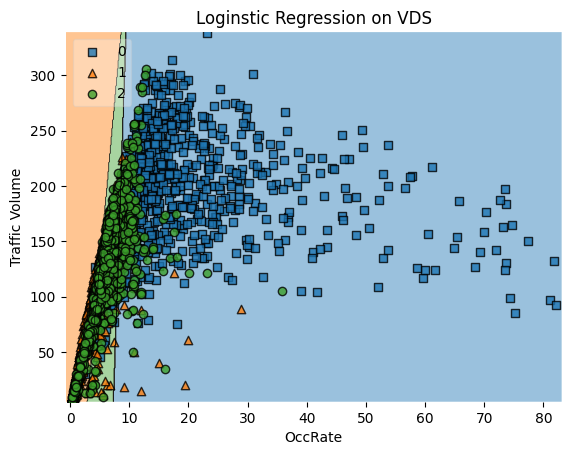

In [23]:
# Training a classifier
lr = LogisticRegression()
lr.fit(X1, y)
plot_decision_regions(X1, y, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('Loginstic Regression on VDS')
plt.show()


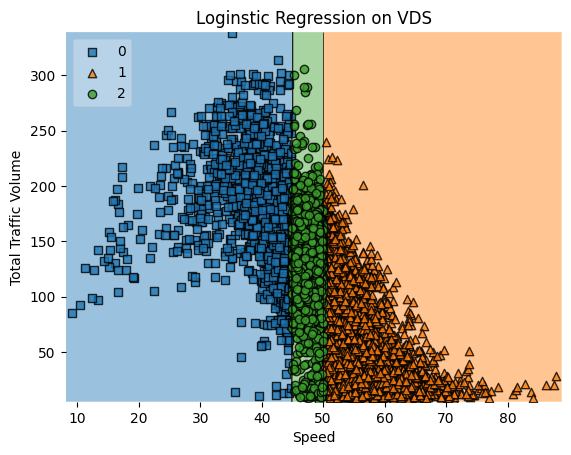

In [24]:
# Training a classifier
lr = LogisticRegression()
lr.fit(X2, y)
plot_decision_regions(X2, y, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('Speed')
plt.ylabel('Total Traffic Volume')
plt.title('Loginstic Regression on VDS')
plt.show()


# 2) <a id='svm'>SVM</a><br>

<img src = "https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg">

**“Support Vector Machine” (SVM)** is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).
(https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


In [ ]:
Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
svm = SVC()
svm.fit(X1, y)
plot_decision_regions(X1, y, clf=lr, legend=2)

plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('SVM on VDS')
plt.show()

In [ ]:
svm = SVC()
svm.fit(X2, y)
plot_decision_regions(X2, y, clf=lr, legend=2)
plt.xlabel('Speed')
plt.ylabel('Traffic Volume')
plt.title('SVM on VDS')
plt.show()

# 3) <a id='decision'>Decision tree</a><br>

<img src = "https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png">

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
tree = DecisionTreeClassifier()
tree.fit(X1, y)
plot_decision_regions(X1, y, clf=tree, legend=2)

# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('Decision Tree on VDS')
plt.show()

In [ ]:
# Training a classifier
tree = DecisionTreeClassifier()
tree.fit(X2, y)
plot_decision_regions(X2, y, clf=tree, legend=2)

# Adding axes annotations
plt.xlabel('Speed')
plt.ylabel('Traffic Volume')
plt.title('Decision Tree on VDS')
plt.show()

# 4) Random Forest Classification

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345">

In [ ]:
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
forest = RandomForestClassifier(max_depth=2)
forest.fit(X1, y)
plot_decision_regions(X1, y, clf=forest, legend=2)


# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('Random Forest on VDS')
plt.show()


In [ ]:
forest = RandomForestClassifier(max_depth=2)
forest.fit(X2, y)
plot_decision_regions(X2, y, clf=forest, legend=2)

# Adding axes annotations
plt.xlabel('Speed')
plt.ylabel('Traffic Volume')
plt.title('Random Forest on VDS')
plt.show()

# 5) <a id='knn'>KNN</a><br>

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

**K nearest neighbors** is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique.
(https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X1, y)
plot_decision_regions(X1, y, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('KNN on VDS')
plt.show()


In [ ]:
# Training a classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X2, y)
plot_decision_regions(X2, y, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('Speed')
plt.ylabel('Traffic Volume')
plt.title('KNN on VDS')
plt.show()


# 6) <a id=' Gradient Boosting Classifier'>GradientBoosting</a><br>

* Gradient boosting is one of the most powerful techniques for building **predictive models**.
* The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
* A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
* Gradient boosting is a **greedy algorithm** and can overfit a training dataset quickly.
* GB builds an additive model in a forward stage-wise fashion.

<img src="https://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png">

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
# Training a classifier
gboost=GradientBoostingClassifier()
gboost.fit(X1, y)
plot_decision_regions(X1, y, clf=gboost, legend=2)

# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('GradientBoosting on VDS')
plt.show()

In [ ]:
# Training a classifier
gboost=GradientBoostingClassifier()
gboost.fit(X2, y)
plot_decision_regions(X2, y, clf=gboost, legend=2)

# Adding axes annotations
plt.xlabel('OccRate')
plt.ylabel('Traffic Volume')
plt.title('GradientBoosting on VDS')
plt.show()